<a href="https://colab.research.google.com/github/CrushedKatana/PCVK/blob/main/Week5_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## D. PERCOBAAN PRAKTIKUM

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

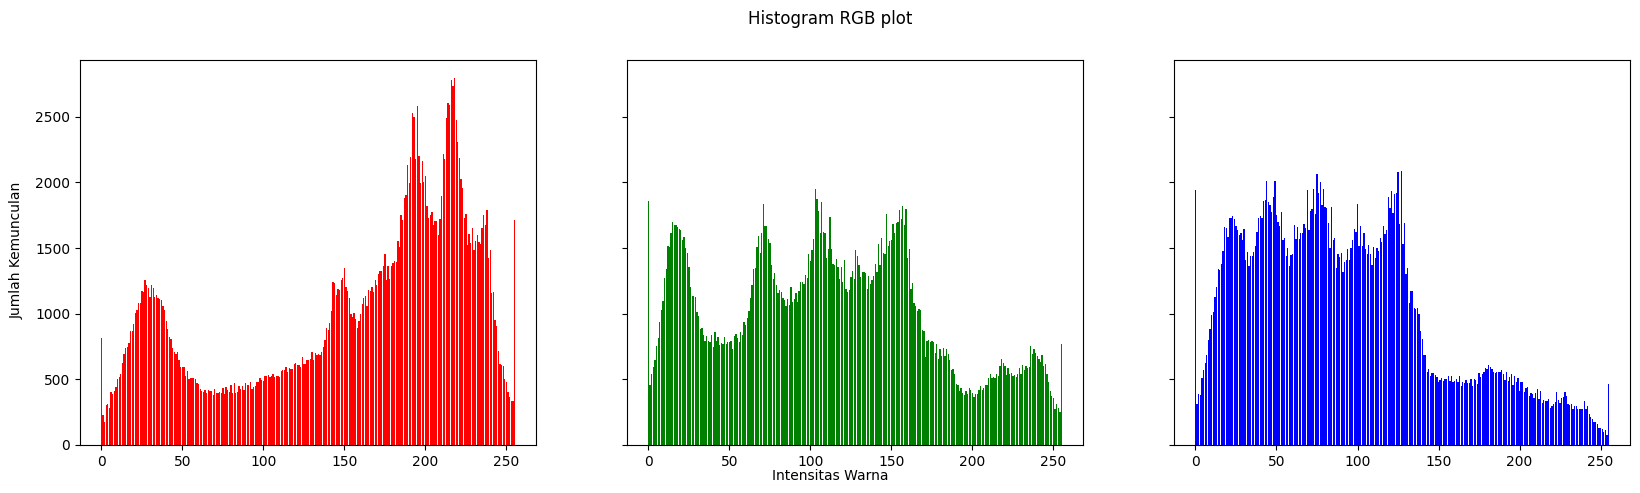

In [6]:
#membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive//PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height):
    for x in range(0,width):
        red [img[y] [x] [0]] += 1
        green [img[y] [x] [1]] += 1
        blue [img[y] [x] [2]] += 1

names = np.arange(256)
fig, axs = plt.subplots (1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs [0].bar(names, red, color='red')
axs [1].bar(names, green, color='green')
axs [2].bar(names, blue, color='blue')

## PERTANYAAN PRAKTIKUM D1

###  1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

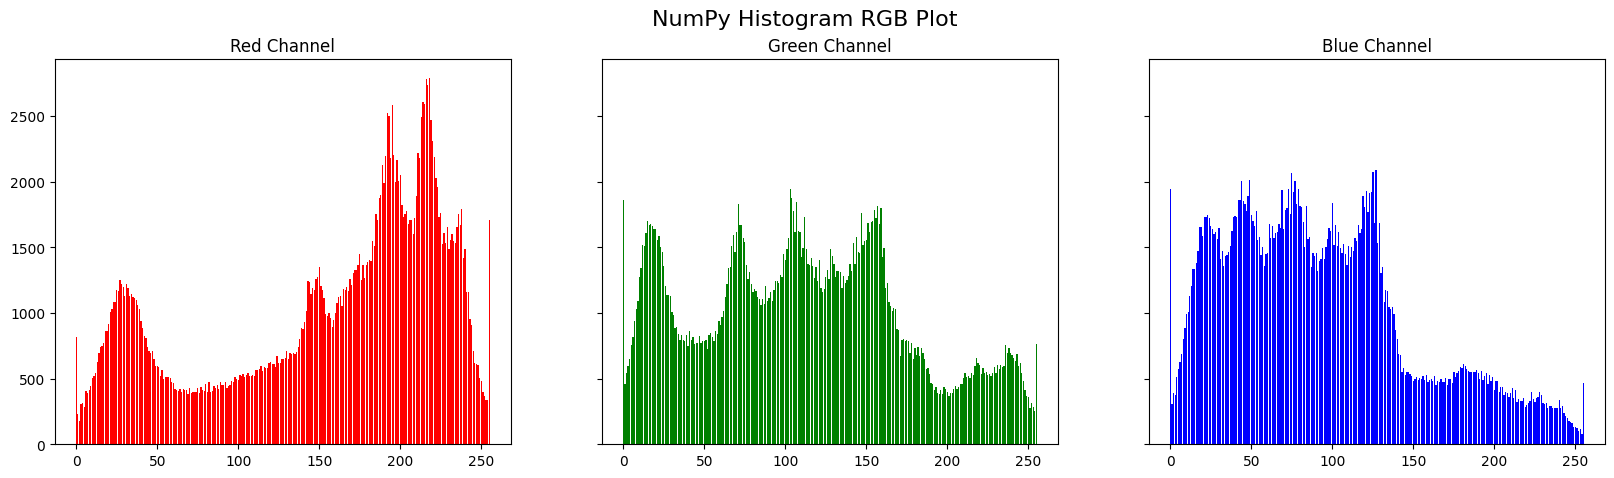

In [7]:
# --- Histogram Calculation using NumPy ---
red_hist_np, bins = np.histogram(img[:,:,0].ravel(), bins=256, range=[0,256])
green_hist_np, bins = np.histogram(img[:,:,1].ravel(), bins=256, range=[0,256])
blue_hist_np, bins = np.histogram(img[:,:,2].ravel(), bins=256, range=[0,256])

# --- Plotting the Histograms ---
pixel_intensities = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle('NumPy Histogram RGB Plot', fontsize=16)
axs[0].bar(pixel_intensities, red_hist_np, color='red')
axs[0].set_title('Red Channel')
axs[1].bar(pixel_intensities, green_hist_np, color='green')
axs[1].set_title('Green Channel')
axs[2].bar(pixel_intensities, blue_hist_np, color='blue')
axs[2].set_title('Blue Channel')
plt.show()

### 2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg. Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung gelap, terang, atau kontras rendah.

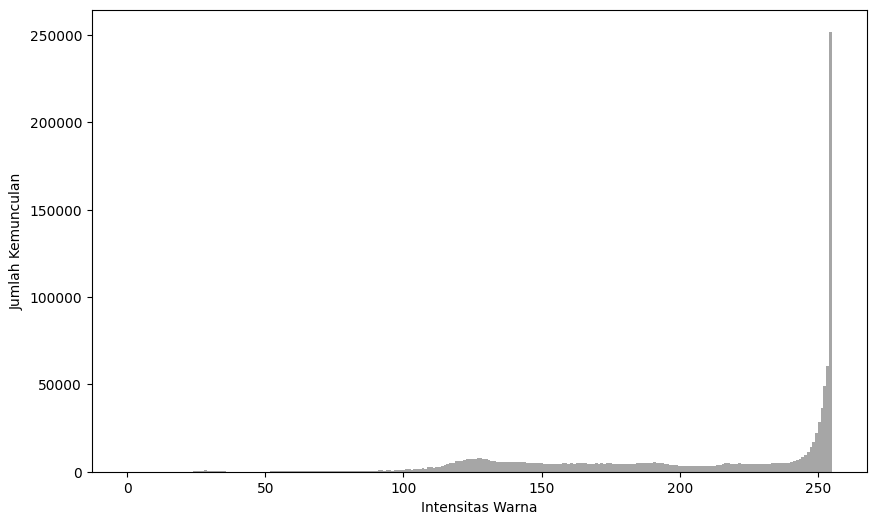

In [8]:
try:
    ktm_path = '/content/drive/MyDrive/PCVK/Images/KTM lama.jpg'
    ktm_img = cv.imread(ktm_path)
    ktm_img_rgb = cv.cvtColor(ktm_img, cv.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.hist(ktm_img_rgb.ravel(), bins=256, color='gray', alpha=0.7)
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.show()
except:
    print(" Could not load 'KTM lama.jpg'. Please check the file path in your Drive.")

## D-2: Percobaan Histogram *Equalization*

1. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

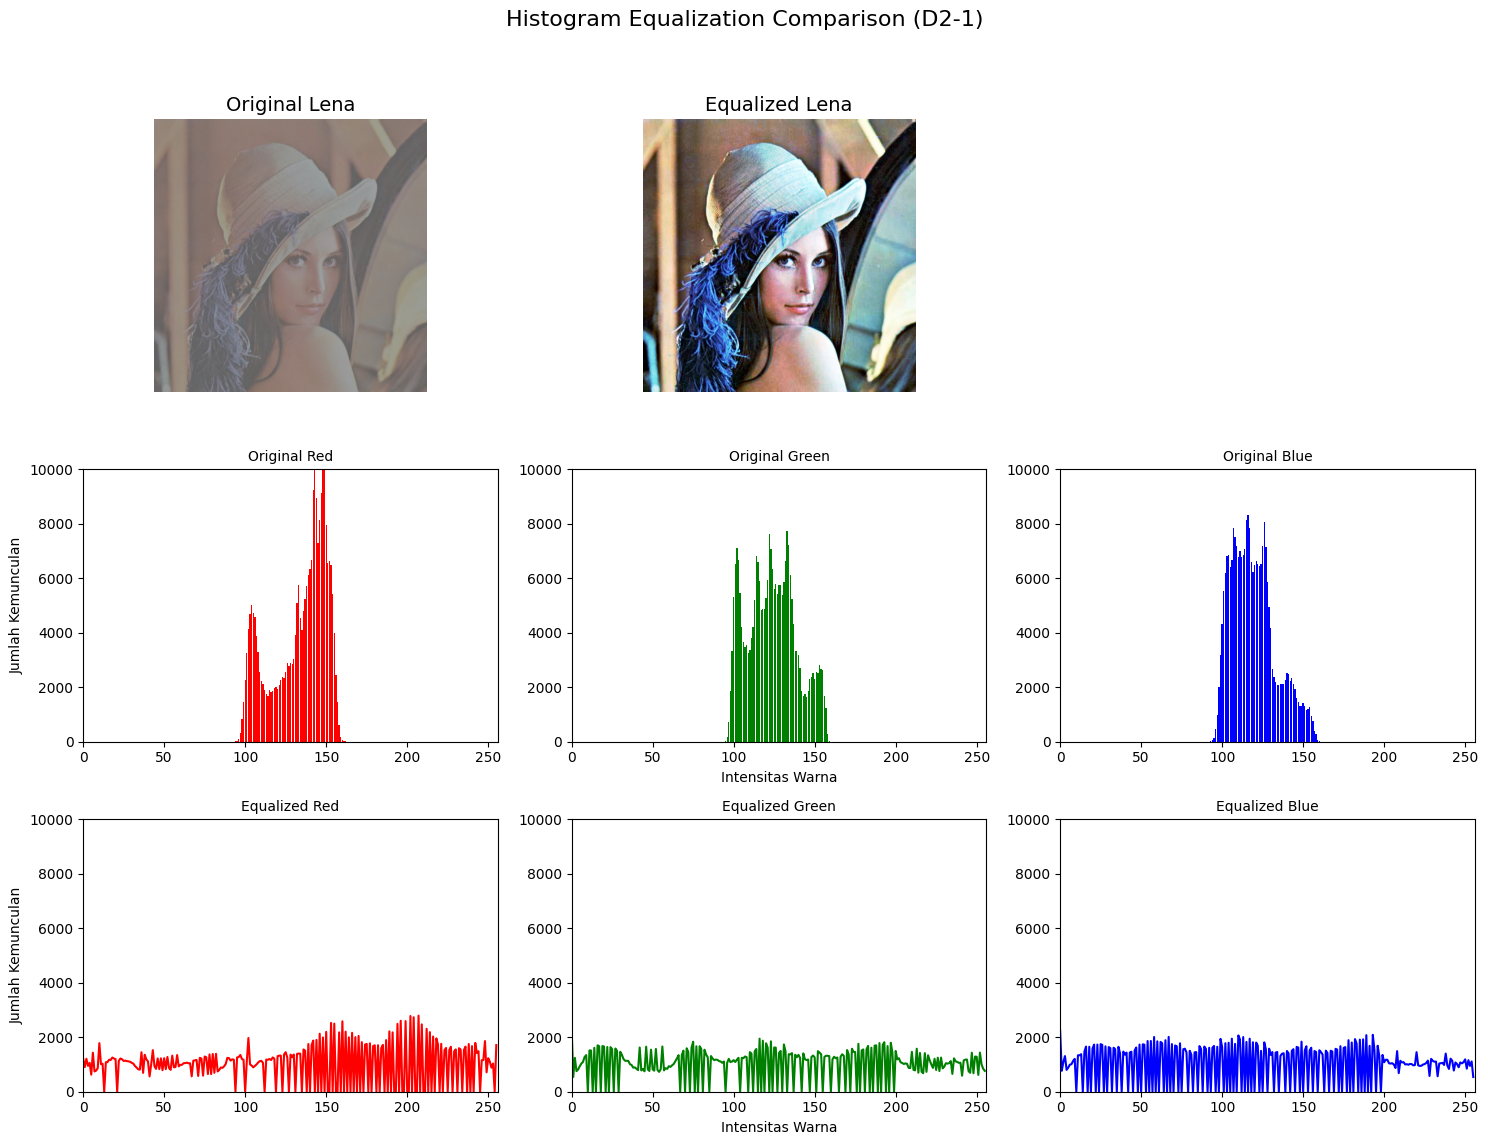


PSNR Value: 28.46 dB


In [32]:
def calculate_psnr(img1, img2):
    """Calculates the PSNR between two images."""
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

# --- Load Original Lena Image ---
IMG_PATH = '/content/drive/MyDrive//PCVK/Images/lena_lc.jpg' # Corrected: Use the path string
try:
    img_bgr = cv.imread(IMG_PATH) # Use the path string here
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found at {IMG_PATH}")

    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

    # --- Plotting in a 3x3 Grid for Images and Histograms ---
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(3, 3) # 3 rows, 3 columns total

    # Row 1: Images
    ax_img_orig = fig.add_subplot(gs[0, 0])
    ax_img_orig.imshow(img_rgb)
    ax_img_orig.set_title('Original Lena', fontsize=14)
    ax_img_orig.axis('off')

    ax_img_eq = fig.add_subplot(gs[0, 1])
    ax_img_eq.imshow(img_equalized_rgb)
    ax_img_eq.set_title('Equalized Lena', fontsize=14)
    ax_img_eq.axis('off')

    # Add a blank space between the images, like in your example
    fig.add_subplot(gs[0, 1]).axis('off')

    # Row 2: Original Histograms
    colors = ('red', 'green', 'blue')
    for i, col_name in enumerate(colors):
        ax_hist_orig = fig.add_subplot(gs[1, i])
        hist_orig = cv.calcHist([img_rgb], [i], None, [256], [0, 256])
        ax_hist_orig.bar(range(256), hist_orig.ravel(), color=col_name) # Changed to bar plot
        ax_hist_orig.set_xlim([0, 256])
        ax_hist_orig.set_ylim([0, 10000])
        if i == 0: ax_hist_orig.set_ylabel('Jumlah Kemunculan', fontsize=10)
        if i == 1: ax_hist_orig.set_xlabel('Intensitas Warna', fontsize=10)
        ax_hist_orig.set_title(f'Original {col_name.capitalize()}', fontsize=10)

    # Row 3: Equalized Histograms
    for i, col_name in enumerate(colors):
        ax_hist_eq = fig.add_subplot(gs[2, i])
        hist_eq = cv.calcHist([img_equalized_rgb], [i], None, [256], [0, 256])
        ax_hist_eq.plot(hist_eq, color=col_name)
        ax_hist_eq.set_xlim([0, 256])
        ax_hist_eq.set_ylim([0, 10000])
        if i == 0: ax_hist_eq.set_ylabel('Jumlah Kemunculan', fontsize=10)
        if i == 1: ax_hist_eq.set_xlabel('Intensitas Warna', fontsize=10)
        ax_hist_eq.set_title(f'Equalized {col_name.capitalize()}', fontsize=10)

    fig.suptitle('Histogram Equalization Comparison (D2-1)', fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

    print(f"\nPSNR Value: {psnr_value:.2f} dB")

except FileNotFoundError as fnfe:
    print(f"Error: {fnfe}. Please ensure 'lena_lc.jpg' is in the specified path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

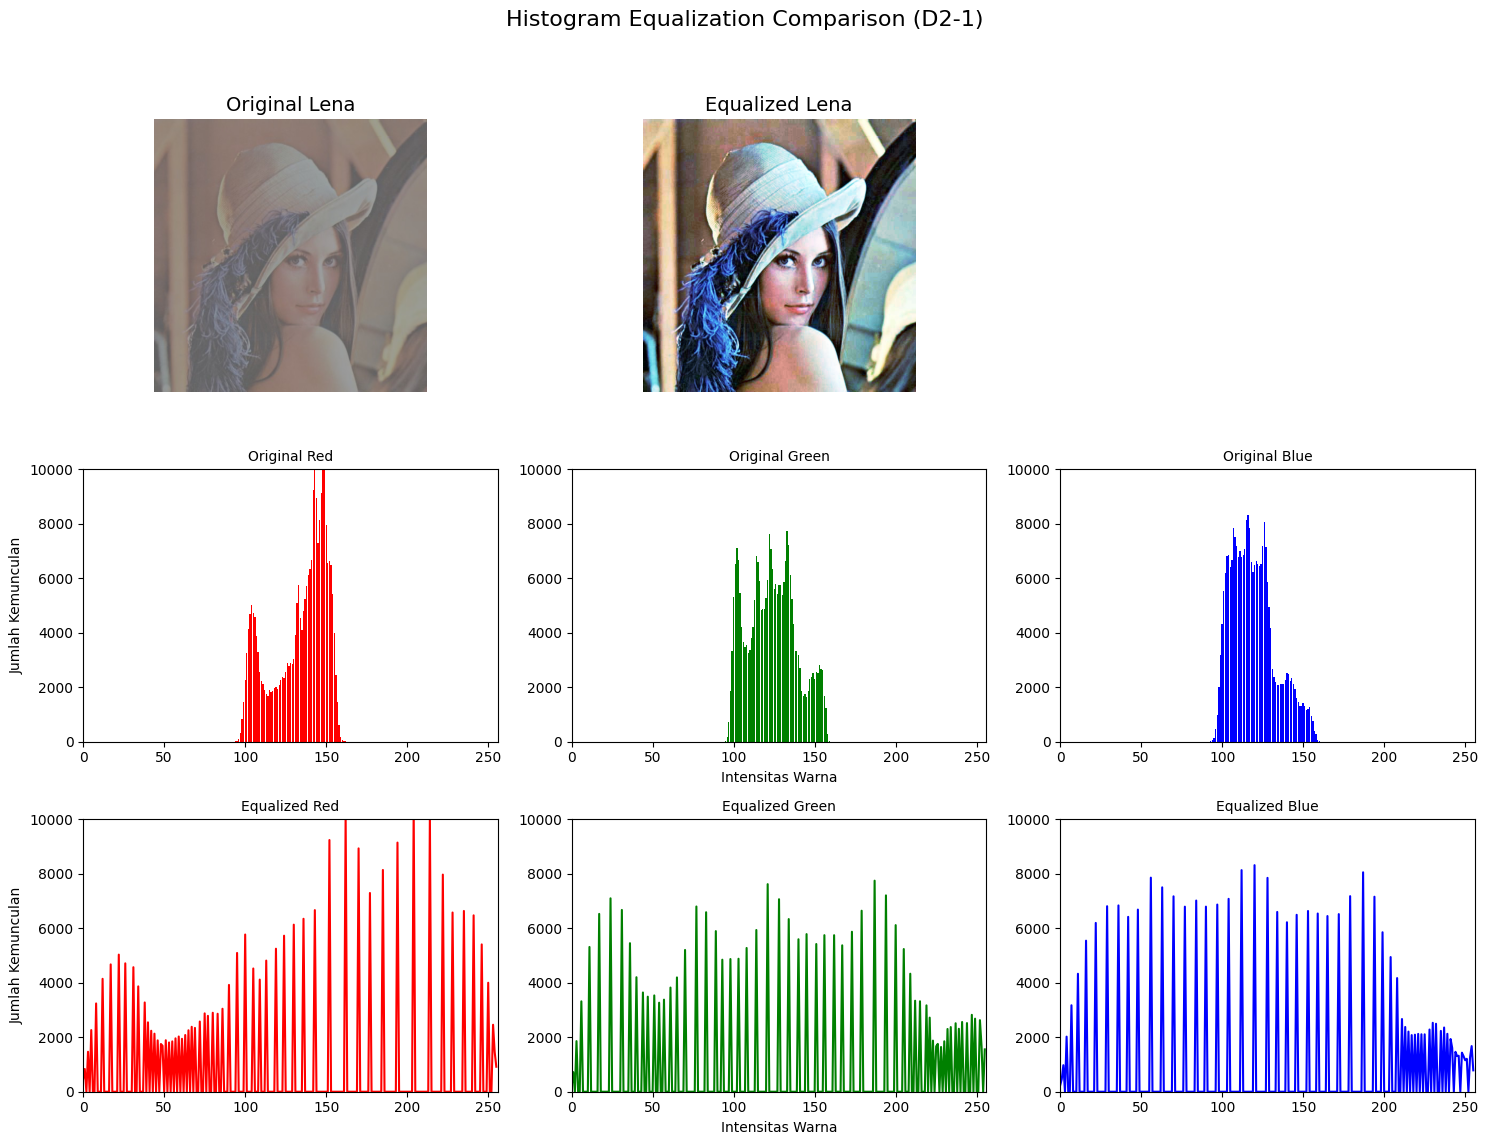


PSNR Value: 27.77 dB


In [10]:
def calculate_psnr(img1, img2):
    """Calculates the PSNR between two images."""
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

# --- Load Original Lena Image ---
IMG_PATH = '/content/drive/MyDrive//PCVK/Images/lena_lc.jpg' # Corrected: Use the path string
try:
    img_bgr = cv.imread(IMG_PATH) # Use the path string here
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found at {IMG_PATH}")

    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

    # --- Histogram Equalization using OpenCV ---
    # As per the module, we use cv2.equalizeHist
    b, g, r = cv.split(img_bgr) # OpenCV works with BGR
    b_equalized = cv.equalizeHist(b)
    g_equalized = cv.equalizeHist(g)
    r_equalized = cv.equalizeHist(r)
    img_equalized_bgr = cv.merge((b_equalized, g_equalized, r_equalized))
    img_equalized_rgb = cv.cvtColor(img_equalized_bgr, cv.COLOR_BGR2RGB)

    # --- PSNR Calculation ---
    psnr_value = calculate_psnr(img_rgb, img_equalized_rgb)

    # --- Plotting in a 3x3 Grid for Images and Histograms ---
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(3, 3) # 3 rows, 3 columns total

    # Row 1: Images
    ax_img_orig = fig.add_subplot(gs[0, 0])
    ax_img_orig.imshow(img_rgb)
    ax_img_orig.set_title('Original Lena', fontsize=14)
    ax_img_orig.axis('off')

    ax_img_eq = fig.add_subplot(gs[0, 1])
    ax_img_eq.imshow(img_equalized_rgb)
    ax_img_eq.set_title('Equalized Lena', fontsize=14)
    ax_img_eq.axis('off')

    # Add a blank space between the images, like in your example
    fig.add_subplot(gs[0, 1]).axis('off')

    # Row 2: Original Histograms
    colors = ('red', 'green', 'blue')
    for i, col_name in enumerate(colors):
        ax_hist_orig = fig.add_subplot(gs[1, i])
        hist_orig = cv.calcHist([img_rgb], [i], None, [256], [0, 256])
        ax_hist_orig.bar(range(256), hist_orig.ravel(), color=col_name) # Changed to bar plot
        ax_hist_orig.set_xlim([0, 256])
        ax_hist_orig.set_ylim([0, 10000])
        if i == 0: ax_hist_orig.set_ylabel('Jumlah Kemunculan', fontsize=10)
        if i == 1: ax_hist_orig.set_xlabel('Intensitas Warna', fontsize=10)
        ax_hist_orig.set_title(f'Original {col_name.capitalize()}', fontsize=10)

    # Row 3: Equalized Histograms
    for i, col_name in enumerate(colors):
        ax_hist_eq = fig.add_subplot(gs[2, i])
        hist_eq = cv.calcHist([img_equalized_rgb], [i], None, [256], [0, 256])
        ax_hist_eq.plot(hist_eq, color=col_name)
        ax_hist_eq.set_xlim([0, 256])
        ax_hist_eq.set_ylim([0, 10000])
        if i == 0: ax_hist_eq.set_ylabel('Jumlah Kemunculan', fontsize=10)
        if i == 1: ax_hist_eq.set_xlabel('Intensitas Warna', fontsize=10)
        ax_hist_eq.set_title(f'Equalized {col_name.capitalize()}', fontsize=10)

    fig.suptitle('Histogram Equalization Comparison (D2-1)', fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

    print(f"\nPSNR Value: {psnr_value:.2f} dB")

except FileNotFoundError as fnfe:
    print(f"Error: {fnfe}. Please ensure 'lena_lc.jpg' is in the specified path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### PERTANYAAN PRAKTIKUM D2

1. Perbandingan Citra Lena


a. Gunakan hasil histogram equalization pada citra lena.jpg.

b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.

c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
visual citra? Apakah ada detail baru yang muncul setelah equalization?




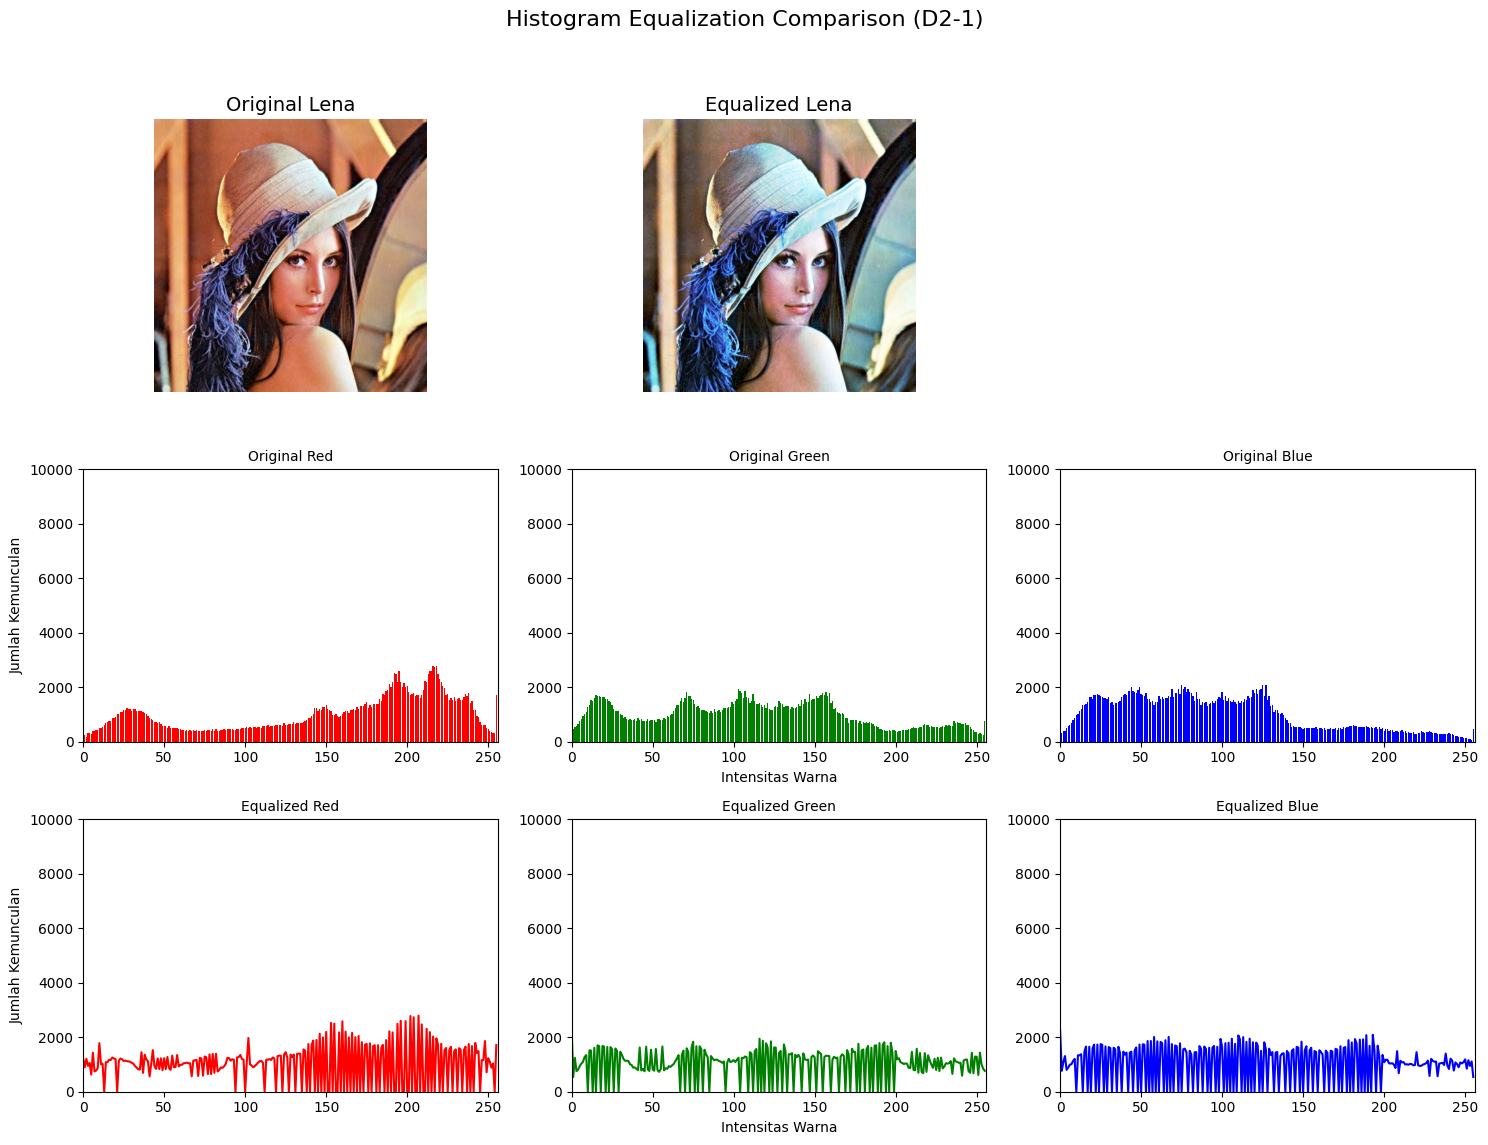

b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.

PSNR Value: 28.46 dB


In [11]:
def calculate_psnr(img1, img2):
    """Calculates the PSNR between two images."""
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

# --- Load Original Lena Image ---
IMG_PATH = '/content/drive/MyDrive//PCVK/Images/lena.jpg' # Corrected: Use the path string
try:
    img_bgr = cv.imread(IMG_PATH) # Use the path string here
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found at {IMG_PATH}")

    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

    # --- Histogram Equalization using OpenCV ---
    # As per the module, we use cv2.equalizeHist
    b, g, r = cv.split(img_bgr) # OpenCV works with BGR
    b_equalized = cv.equalizeHist(b)
    g_equalized = cv.equalizeHist(g)
    r_equalized = cv.equalizeHist(r)
    img_equalized_bgr = cv.merge((b_equalized, g_equalized, r_equalized))
    img_equalized_rgb = cv.cvtColor(img_equalized_bgr, cv.COLOR_BGR2RGB)

    # --- PSNR Calculation ---
    psnr_value = calculate_psnr(img_rgb, img_equalized_rgb)

    # --- Plotting in a 3x3 Grid for Images and Histograms ---
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(3, 3) # 3 rows, 3 columns total

    # Row 1: Images
    ax_img_orig = fig.add_subplot(gs[0, 0])
    ax_img_orig.imshow(img_rgb)
    ax_img_orig.set_title('Original Lena', fontsize=14)
    ax_img_orig.axis('off')

    ax_img_eq = fig.add_subplot(gs[0, 1])
    ax_img_eq.imshow(img_equalized_rgb)
    ax_img_eq.set_title('Equalized Lena', fontsize=14)
    ax_img_eq.axis('off')

    # Add a blank space in the 0,2 position to match your example
    fig.add_subplot(gs[0, 2]).axis('off')

    # Row 2: Original Histograms
    colors = ('red', 'green', 'blue')
    for i, col_name in enumerate(colors):
        ax_hist_orig = fig.add_subplot(gs[1, i])
        hist_orig = cv.calcHist([img_rgb], [i], None, [256], [0, 256])
        ax_hist_orig.bar(range(256), hist_orig.ravel(), color=col_name) # Changed to bar plot
        ax_hist_orig.set_xlim([0, 256])
        ax_hist_orig.set_ylim([0, 10000])
        if i == 0: ax_hist_orig.set_ylabel('Jumlah Kemunculan', fontsize=10)
        if i == 1: ax_hist_orig.set_xlabel('Intensitas Warna', fontsize=10)
        ax_hist_orig.set_title(f'Original {col_name.capitalize()}', fontsize=10)

    # Row 3: Equalized Histograms
    for i, col_name in enumerate(colors):
        ax_hist_eq = fig.add_subplot(gs[2, i])
        hist_eq = cv.calcHist([img_equalized_rgb], [i], None, [256], [0, 256])
        ax_hist_eq.plot(hist_eq, color=col_name)
        ax_hist_eq.set_xlim([0, 256])
        ax_hist_eq.set_ylim([0, 10000])
        if i == 0: ax_hist_eq.set_ylabel('Jumlah Kemunculan', fontsize=10)
        if i == 1: ax_hist_eq.set_xlabel('Intensitas Warna', fontsize=10)
        ax_hist_eq.set_title(f'Equalized {col_name.capitalize()}', fontsize=10)

    fig.suptitle('Histogram Equalization Comparison (D2-1)', fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()



    print(f"b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.")

    print(f"\nPSNR Value: {psnr_value:.2f} dB")

except FileNotFoundError as fnfe:
    print(f"Error: {fnfe}. Please ensure 'lena.jpg' is in the specified path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### D-3 TUGAS PRAKTIKUM DITHERING


1. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

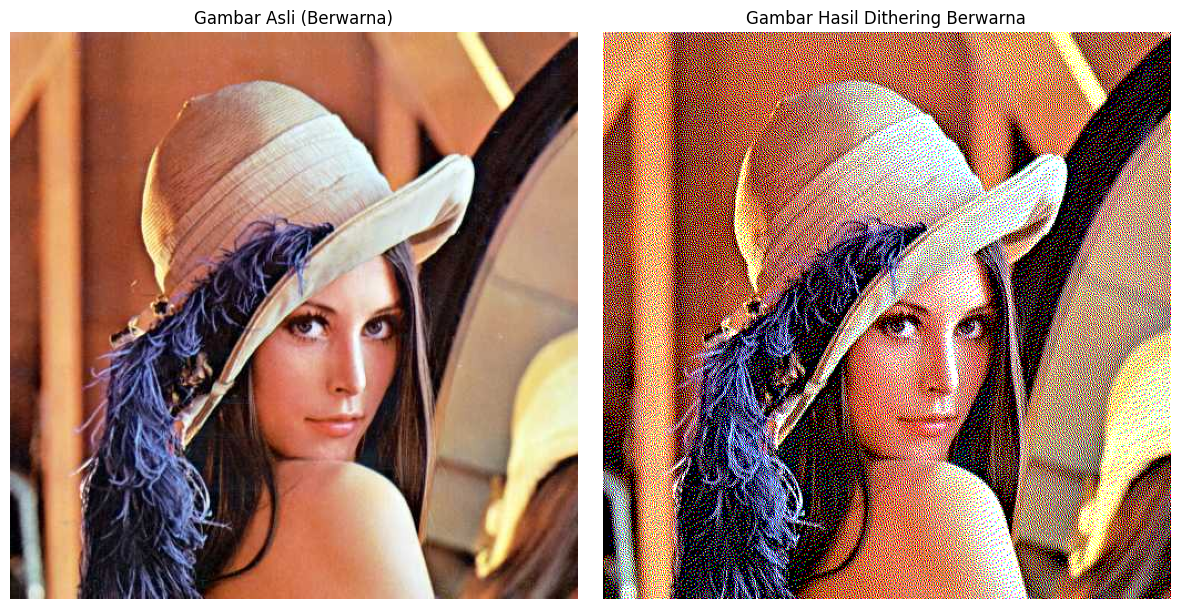

In [58]:

# Path ke gambar
IMG_PATH = '/content/drive/MyDrive/PCVK/Images/lena.jpg'

try:
    # 1. Memuat gambar dalam mode WARNA (BGR secara default di OpenCV)
    img_bgr = cv.imread(IMG_PATH)

    if img_bgr is None:
        raise FileNotFoundError(f"Image not found at {IMG_PATH}")

    # Konversi ke float32 untuk akurasi perhitungan error
    # Kita akan bekerja dengan salinannya agar gambar asli tidak berubah
    img_float = img_bgr.astype(np.float32)

    # Threshold untuk setiap channel
    threshold = 128

    rows, cols, _ = img_float.shape

    # 2. Iterasi melalui setiap piksel gambar
    for y in range(rows):
        for x in range(cols):
            # Ambil nilai [B, G, R] dari piksel saat ini
            old_pixel = img_float[y, x].copy() # Salin untuk menghindari referensi

            # 3. Kuantisasi setiap channel ke 0 atau 255
            new_pixel = np.where(old_pixel >= threshold, 255, 0)

            # Simpan nilai baru ke gambar float kita untuk diproses
            img_float[y, x] = new_pixel

            # 4. Hitung error kuantisasi untuk setiap channel
            # Hasilnya akan menjadi array [error_b, error_g, error_r]
            quant_error = old_pixel - new_pixel

            # 5. Sebarkan error ke piksel tetangga untuk setiap channel
            # NumPy akan menangani operasi ini secara element-wise
            if x + 1 < cols:
                img_float[y, x + 1] += quant_error * (7 / 16)
            if x - 1 >= 0 and y + 1 < rows:
                img_float[y + 1, x - 1] += quant_error * (3 / 16)
            if y + 1 < rows:
                img_float[y + 1, x] += quant_error * (5 / 16)
            if x + 1 < cols and y + 1 < rows:
                img_float[y + 1, x + 1] += quant_error * (1 / 16)

    # Konversi hasil akhir kembali ke uint8 untuk ditampilkan
    img_dithered_bgr = np.clip(img_float, 0, 255).astype(np.uint8)

    # Konversi BGR (OpenCV) ke RGB (Matplotlib) untuk tampilan yang benar
    img_original_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
    img_dithered_rgb = cv.cvtColor(img_dithered_bgr, cv.COLOR_BGR2RGB)

    # Tampilkan gambar asli dan hasil dithering
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_original_rgb)
    plt.title('Gambar Asli (Berwarna)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_dithered_rgb)
    plt.title('Gambar Hasil Dithering Berwarna')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

except FileNotFoundError as fnfe:
    print(f"Error: {fnfe}. Pastikan file 'lena.jpg' ada di path yang ditentukan.")
except Exception as e:
    print(f"Terjadi error tak terduga: {e}")

Original Grayscale vs. Equalized vs. Dithered Image


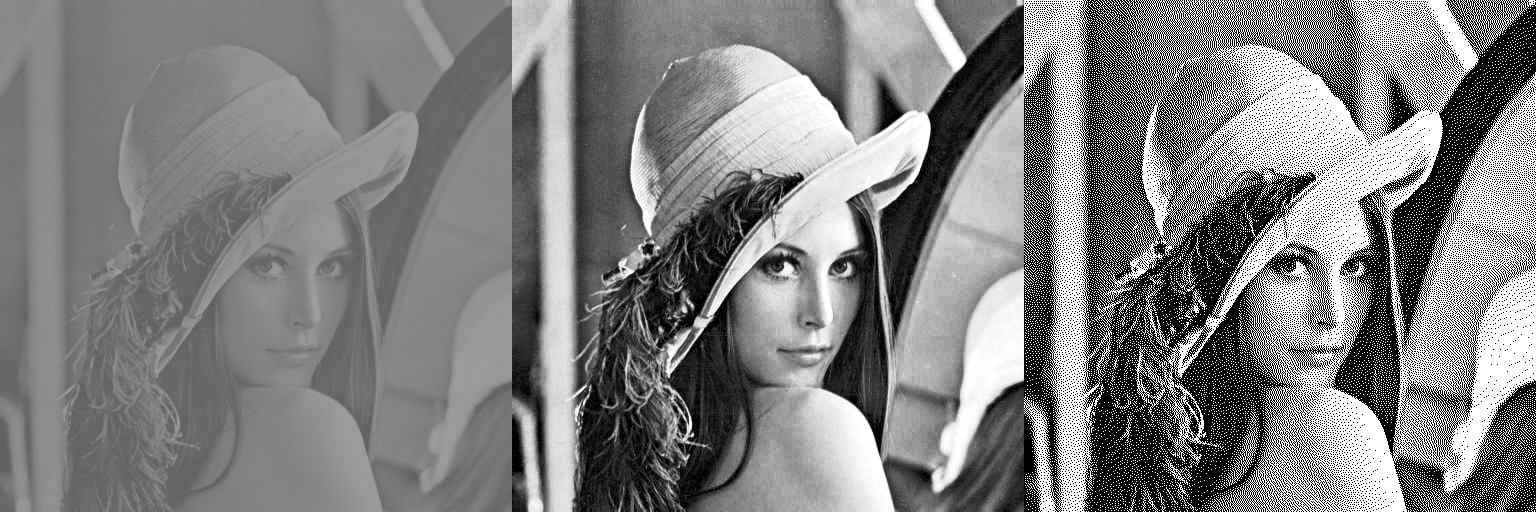

In [33]:
IMG_PATH = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'
try:
    img_bgr = cv.imread(IMG_PATH)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found at {IMG_PATH}")
    gray_img = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)
except FileNotFoundError as fnfe:
    print(f"Error: {fnfe}. Please ensure 'lena_lc.jpg' is in the specified path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

equalized_img = cv.equalizeHist(gray_img)

# 1. Convert the equalized_img to a float32 data type to allow for error diffusion.
dither_img = equalized_img.astype(np.float32)

# 2. Get the height and width of the image.
height, width = dither_img.shape

# 3. Iterate through each pixel of the image.
for y in range(height):
  for x in range(width):
    # 4. For each pixel, determine the new pixel value (either 0 or 255) based on whether the current pixel intensity is greater than 128.
    old_pixel = dither_img[y, x]
    new_pixel = 255 if old_pixel > 128 else 0

    # Set the new pixel value in the dithered image
    dither_img[y, x] = new_pixel

    # 5. Calculate the quantization error as the difference between the original pixel value and the new pixel value.
    quant_error = old_pixel - new_pixel

    # 6. Distribute the quantization error to neighboring pixels according to the Floyd-Steinberg coefficients
    # (7/16 to the right, 3/16 to the bottom-left, 5/16 to the bottom, and 1/16 to the bottom-right), ensuring not to go out of bounds.
    if (x + 1) < width:
      dither_img[y, x + 1] += quant_error * 7 / 16
    if (x - 1) >= 0 and (y + 1) < height:
      dither_img[y + 1, x - 1] += quant_error * 3 / 16
    if (y + 1) < height:
      dither_img[y + 1, x] += quant_error * 5 / 16
    if (x + 1) < width and (y + 1) < height:
      dither_img[y + 1, x + 1] += quant_error * 1 / 16

# 7. Convert the dithered image back to uint8 data type after the diffusion process is complete.
dither_img = dither_img.astype(np.uint8)

# Concatenate the original grayscale image, the equalized image, and the dithered image
final_frame = cv.hconcat((gray_img, equalized_img, dither_img))

# Print a descriptive title
print("Original Grayscale vs. Equalized vs. Dithered Image")

# Display the concatenated image
cv2_imshow(final_frame)

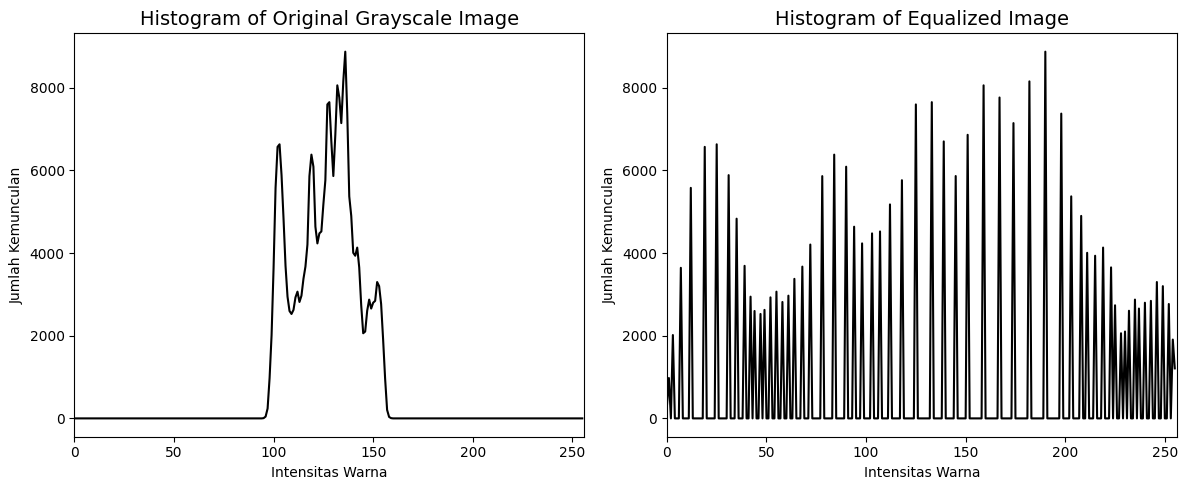

In [ ]:
IMG_PATH = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'
try:
    img_bgr = cv.imread(IMG_PATH)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found at {IMG_PATH}")
    gray_img = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)

    equalized_img = cv.equalizeHist(gray_img)

    # Calculate histograms
    original_hist = cv.calcHist([gray_img], [0], None, [256], [0, 256])
    equalized_hist = cv.calcHist([equalized_img], [0], None, [256], [0, 256])

    # Plot histograms side-by-side
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(original_hist, color='black')
    plt.title('Histogram of Original Grayscale Image', fontsize=14)
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([0, 256])

    plt.subplot(1, 2, 2)
    plt.plot(equalized_hist, color='black')
    plt.title('Histogram of Equalized Image', fontsize=14)
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

except FileNotFoundError as fnfe:
    print(f"Error: {fnfe}. Please ensure 'lena_lc.jpg' is in the specified path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")